## The Sparks Foundation
### GRIP June 2022

### Name: Mitta Sai Nitish

### Data Science And Business Anlytics

### Task1: Prediction Using Supervised ML

### Aim- Predict the percentage of students based on the number of study hours using Supervised Learning

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

### Loading the DataSet

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Exploring Data

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

In [9]:
df.columns.unique()

Index(['Hours', 'Scores'], dtype='object')

### Data Visualization

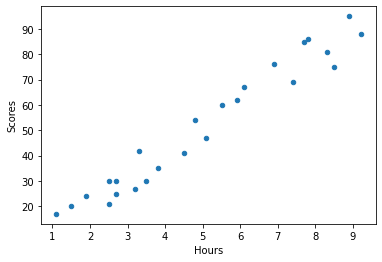

In [10]:
df.plot.scatter(x="Hours",y="Scores")
plt.show()

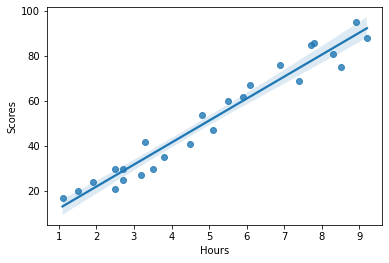

In [11]:
sns.regplot(x="Hours",y="Scores",data=df)
plt.show()

#### From the above graph it is clear that there is a positive linear relation between the number of hours studied and percentage of score.

In [12]:
correlation = df.corr()
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


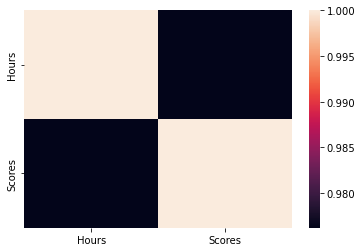

In [13]:
sns.heatmap(correlation)
plt.show()

### CHECKING FOR OUTLIERS

<AxesSubplot:>

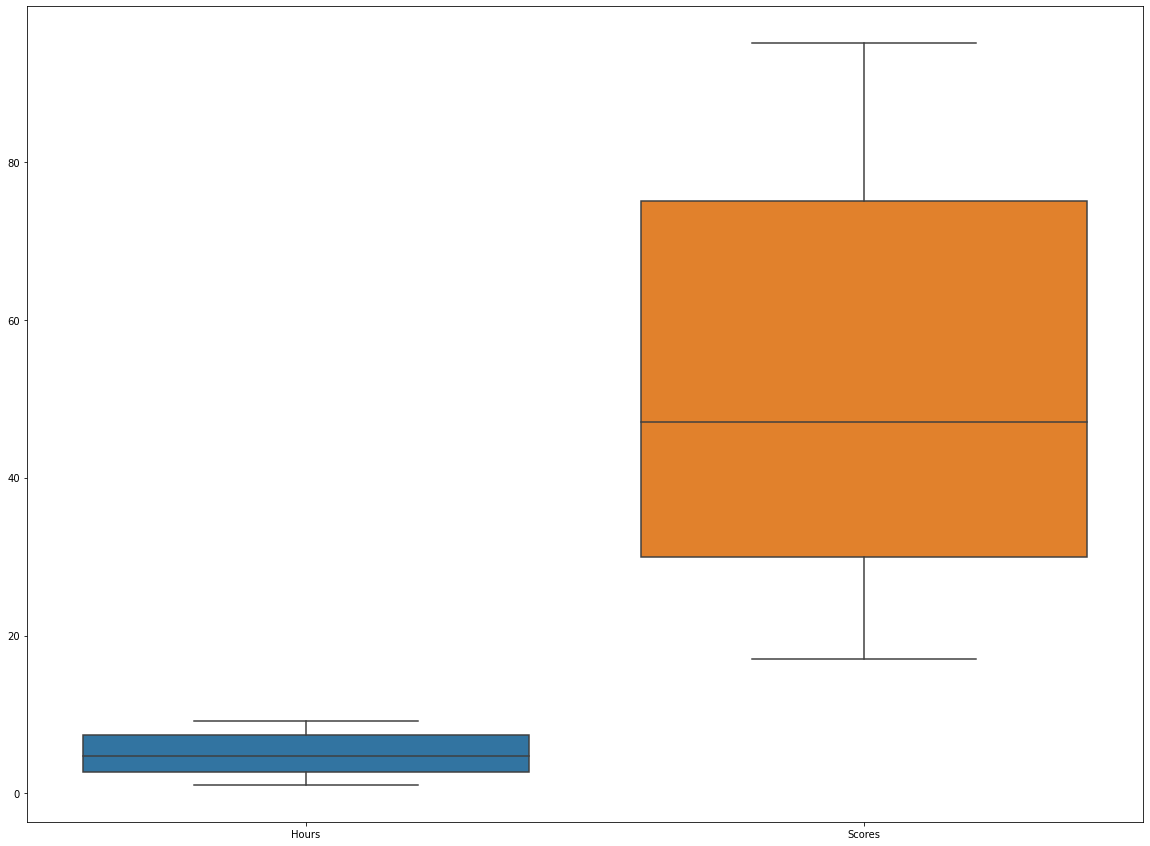

In [14]:
fig,ax = plt.subplots(figsize=(20,15))
sns.boxplot(data = df,ax=ax)

#### From the above plots it is clear that there are no outliers present in the data.

### SPLITTING THE DATA INTO TRAINING AND TESTING SETS

In [15]:
x = df.drop(columns=["Scores"]).values
y = df["Scores"].values

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

In [17]:
x_train, x_test, y_train, y_test = x_train.reshape(-1,1), x_test.reshape(-1,1), y_train.reshape(-1,1), y_test.reshape(-1,1)

### TRAINING THE MODEL USING LINEAR REGRESSION

In [18]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [19]:
model.coef_ #m-value

array([[9.91065648]])

In [20]:
model.intercept_ #c-value

array([2.01816004])

### Solving the Equation
Scores = 9.91065648 * Hours + 2.01816004

### Making Prediction on the testing set

In [21]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [22]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [23]:
y_pred = model.predict(x_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

### Plotting regression line and plotting for test data

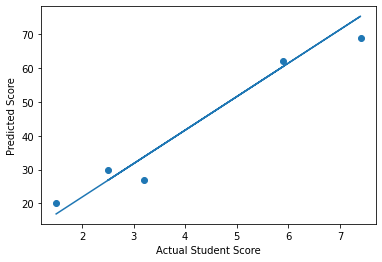

In [24]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred)
plt.xlabel('Actual Student Score')
plt.ylabel('Predicted Score')
plt.show()

In [25]:
print('Test Score')
print(model.score(x_test, y_test))
print('Training Score')
print(model.score(x_train, y_train))

Test Score
0.9454906892105356
Training Score
0.9515510725211552


### Model Evaluation

In [26]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [27]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 21.5987693072174


In [28]:
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 4.6474476121003665


In [29]:
print("R2 Score:", metrics.r2_score(y_test, y_pred))

R2 Score: 0.9454906892105356


### TASK

In [30]:
hours = 9.25
print("Predicted Score if Student Study for 9.25 hrs =", model.predict([[hours]]))

Predicted Score if Student Study for 9.25 hrs = [[93.69173249]]


### Result: As per prediction if a student studies for 9.25 hours daily, he/she is likely to get 93.69%.